In [1]:
######plot Histogram and Histogram Equalization of a given image######
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
from skimage.util import random_noise
figsize=(10,10)

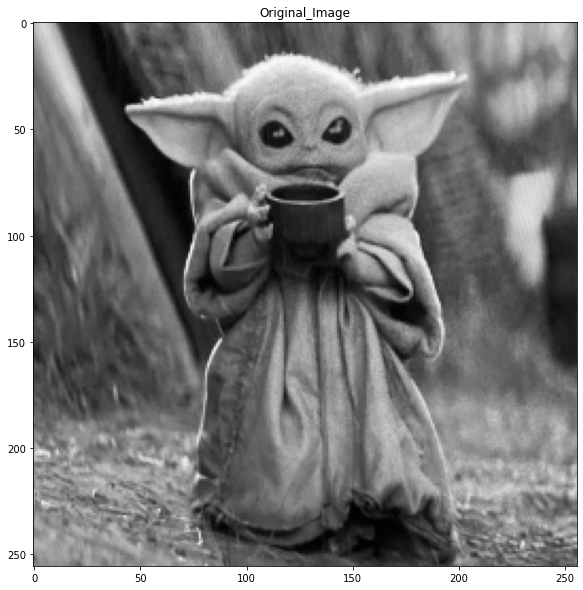

In [2]:
im=cv2.imread('yoda.jpeg')
im=cv2.resize(im,(256,256))
im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(im,cmap="gray",vmin=0,vmax=256)
plt.title("Original_Image")
plt.show()

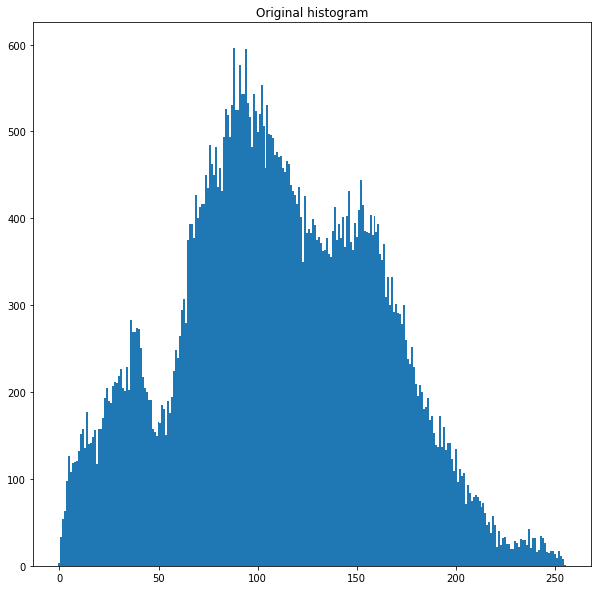

In [3]:
bins_edges_min_max=[0,256]
num_bins=256
bins_count1,bins_edges1=np.histogram(im,num_bins,bins_edges_min_max)
bins_start1= bins_edges1[:-1]
def draw_hist(x_axis,input):
  fig,ax=plt.subplots(figsize=figsize)
  plt.bar(x_axis,input,256/(x_axis[-1]-x_axis[0]+1))
  return fig,ax
###########Original Histogram#############  
draw_hist(bins_start1,bins_count1)
plt.title("Original histogram")
plt.show()

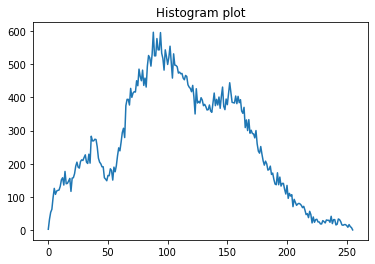

In [4]:
#########Histogram Plot#########
I=np.zeros(256,np.int32)
for i in range(256):
  for j in range(256):
    r=im[i][j]
    I[r]=I[r]+1
plt.title("Histogram plot")
plt.plot(I)

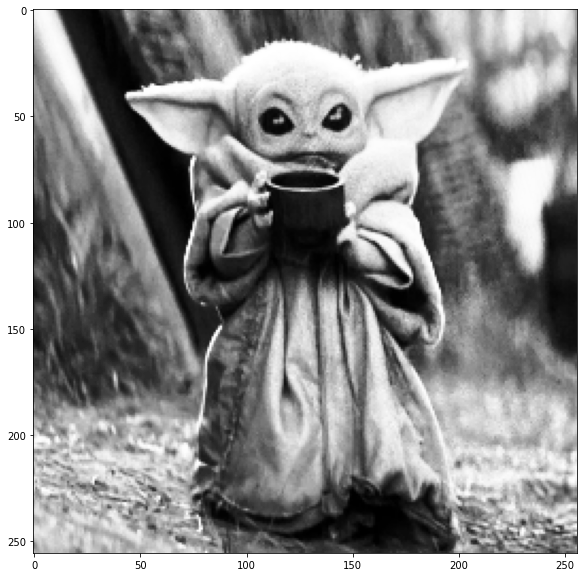

In [5]:
#########Probability Distribution Function#########
pd=np.zeros(256)
for ii in range(256):
  pd[ii]=I[ii]/(256*256)
#########Cumulative Distribution Function#########
cdf=np.cumsum(pd)
f_eq=np.round(cdf*255).astype(int)
I1_eq=f_eq[im]

im1=np.zeros([256,256])
for i1 in range(256):
  for j1 in range(256):
    rr=im[i1][j1]
    im1[i1][j1]=f_eq[rr]
plt.figure(figsize=figsize)
plt.imshow(im1,cmap="gray",vmin=0,vmax=255)
plt.show()

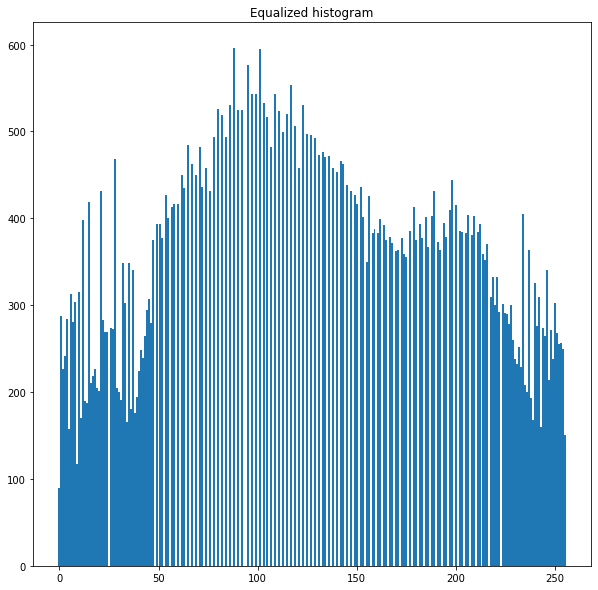

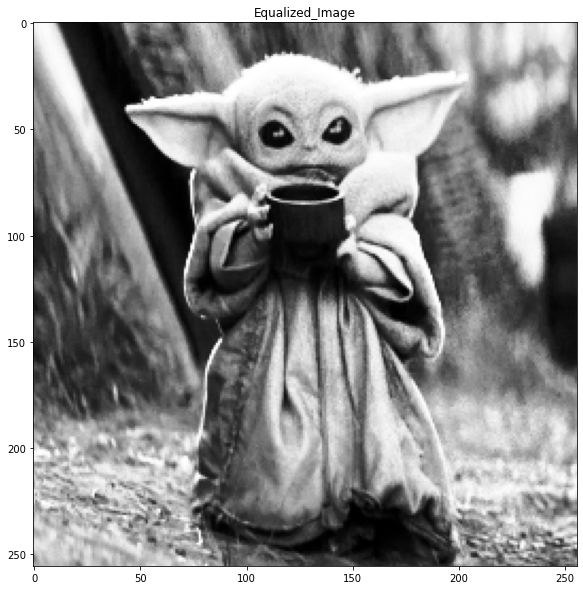

In [6]:
bins_edges_min_max=[0,256]
num_bins=256
bins_count,bins_edges=np.histogram(I1_eq,num_bins,bins_edges_min_max)
bins_start= bins_edges[:-1]

#########Equalized Histogram & Image#########
draw_hist(bins_start,bins_count)
plt.title("Equalized histogram")
plt.show()

plt.figure(figsize=figsize)
plt.imshow(I1_eq,cmap="gray",vmin=0,vmax=255)
plt.title("Equalized_Image")
plt.show()

In [7]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf  import colab_pdf
colab_pdf("Histogram_Equ.ipynb")